# Identifying Hierarchies in Conversation Data

--------------------------------------------------------------------------------------------------------------------------------
*Please Note : This was a project I did with Satalia, London. I was provided slack data which contained conversations on projects between the employees at Satalia. Satalia is a start-up striving for a flat organizational structure. Looking at that fact, I tried to identify latent hierarchies that might emerge in the conversations between employees about the projects. The following report is an explanation of what I did, and implementation of the same using dummy slack data. *

--------------------------------------------------------------------------------------------------------------------------------

### 1) Introduction:

Satalia has implemented a revolutionary non-hierarchical structure for project delivery, instilling in its employees a sense of purpose and accountability. The company is thoroughly focused on this endeavour, and is trying out non-conventional organizational designs with enhanced collaboration, flexible work environments and free flowing communications.

Even in a non-hierarchical structure, it is quite natural that people will tend to act in a hierarchical manner because of the working style or the role that person is playing in the project. While there will always be some key decision makers and key communicator’s in a project, the basic premises of a flat structure is that everyone is almost equally empowered in the project and hence delivers higher then his/her potential. If a particular project (with a non-hierarchical structure) starts showing presence of latent hierarchies, it is the job of the leader to be conscious of it and take remedial actions.

Hence I am going to try to figure out the presence of hierarchy using conversation data in a project. I have built a model for the same, which can be applied for any project. The conversational data has been analysed for number of messages originated or replied and the specific mention of people’s names in the messages. There are two psychological factors basis which I have conducted the analysis:

1) Subconsciously people tend to call and mention more prominent people in group conversations.
2) People with prominence tend to be more confident in posting and expressing on public group conversations.

As next steps, it would be interesting to see the correlation of this analysis with key project outcomes (cost, time, quality and customer feedback). Are projects that tend to have a less hiearchical structure also performing better? Additionally, the leadership may want to put specific measures in place to ‘bring out’ the point of views of non-contributors and leverage the diversity of thought that is the biggest strength of a truly non-hierarchical structure.

--------------------------------------------------------------------------------------------------------------------------------

### 2) The Data

This analysis can be extended to any conversation data on slack. One can export the slack data from the website for the channel of interests ( see for information : https://get.slack.help/hc/en-us/articles/201658943-Export-data-and-message-history). 

If the data is in the following format, the code can be used as is.

,username,Unnamed: 0,timestamp,userid,username.1,fullname,channelid,channel,members,message,mentions,reactions,thread_ts,parent_user_id,reply_count,replies
0,A,6576,1430954949,1212,A,A,C1,X,0,xyz blah,NaN,NaN,NaN,NaN,NaN,NaN
1,B,6581,1430955024,1233,B,B,C2,X,-,blah cc,NaN,NaN,NaN,NaN,NaN,NaN
2,C,6582,1430955044,1244,C,C,C3,X,-,yyy,NaN,NaN,NaN,NaN,NaN,NaN


*Please Note : This data is dummy data - just to give an indication of the format my data was for the analysis. *

**Defining varibles important for analysis:**  
- *username*: the username of the member of project
- *channel*: indicates the name of the project.
- *message*: the text of the message as appeared on slack
- *mentions*: the people who were mentioned in the corresponding message

--------------------------------------------------------------------------------------------------------------------------------

### 2) Building the model to identify hierarchy

In the perfect case of a flat organizational structure, it is expected that there are few or no power centers. It is expected that communication during a project is well balanced across all team members, leading to higher engagement of the team and better project outcomes.This is the core assumption I have used to observe the presence of hierarchies using the conversations on slack. This analysis is limited to slack channel of communication and ideally one needs to add in the email and voice communication channel as well to complete this analysis.

**Model building Approach:**

I aimed to get a prominence measure for the employees working in specific, using the slack conversations. Looking at the data, there were three ways a person's prominence in the project could possibly be measured:

1) The number of messages he/she is posting

2) The mentions he/ she is getting in other people's messages (as in mention column in data)

3) The number of times his/her name is being written in a message (as in message column in data)

For the 1st measure, Ialready had a value on as to how many messages people are posting on the channel group. For the 2nd and 3rd measure, it was important to note that the person is more prominent not only if he/she is getting more mentions, but also if he/she is getting mentions from more prominent people. I hence approach this by finding the **page rank centrality measure** for this, which takes into account a person's prominence being proportional to the prominence of the people mentioning the person.

In order to calculate the measure, I have built a directed, weighted network where:
- A connection from node A to node B refers to the fact that node A mentioned/ wrote name of node B
- The weight of the connection is the number of times that node A mentioned/ wrote name of node B

I then found pagerank centrality measures for all nodes. Basis this we can visualize the employees in each project, and understand the presence of hiearchies.

The code for the model has been put up in the github repository.

--------------------------------------------------------------------------------------------------------------------------------

### 3) Identifying Hierarchy

I will show the output on dummy data, in order to explain how the output can be used to identify hierarchies. 

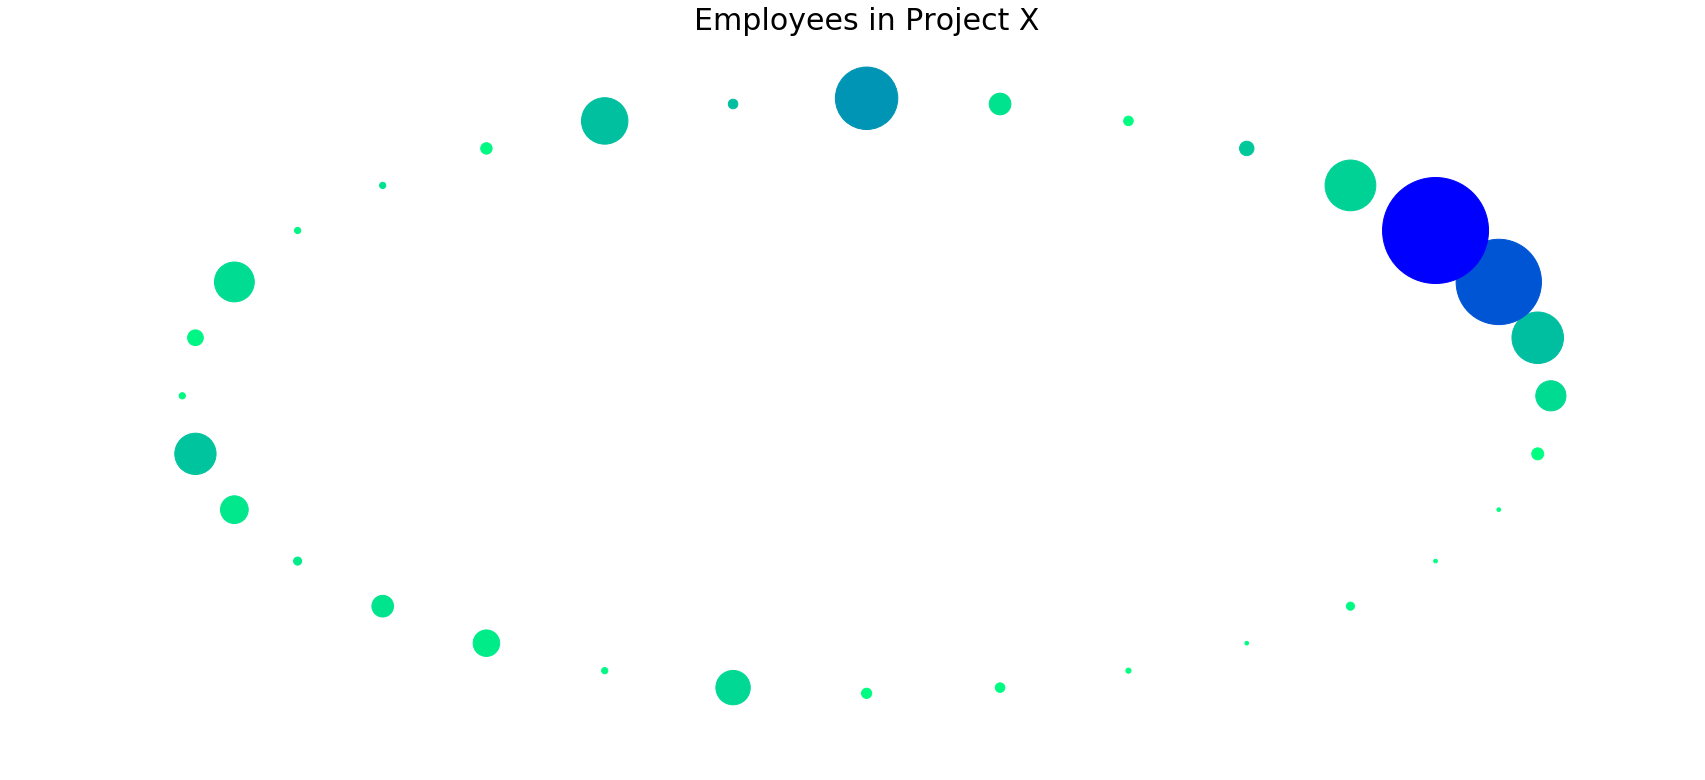

*Please Note : This data used for this is dummy data. In order to get a better view, one can put with_labels = True in the code for graph representation. This will give the name of the individuals in the bubble. *

The above graph represents the following:
- The color of the nodes represent the pagerank centrality score (The darker the color, the higher the pagerank score, and higher the importance)
- The size of the nodes represent the number of messages sent by the person (Larger the node, more the number of messages sent)

As is visible, there appear to be about 10% people with high prominence , about 25% people with less prominence and a large number of people with less prominence. This points to the presence of hierarchy in this project.

One can argue that there will be a few key players in each project, however eliminating those in a flat structure the prominence distribution should similar uniform in a flat structure. 

Below I have shown a distribution in prominence scores for the employees in this project:

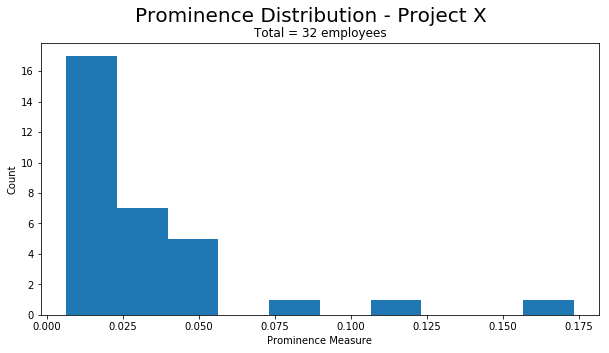

This distribution chart corroborates the comments given on the first chart. There are 3 people in this project who are significantly high on prominence and the prominence distribution is skewed. 

Such a distribution is what would typically be observed in a pure hierarchical structure, with most employees with less prominence (junior level employees), some amount of employees with mid prominence (mid-management) and very few with high prominence (senior-management).

--------------------------------------------------------------------------------------------------------------------------------